In [93]:
import numpy as np
from scipy.stats import multivariate_normal
from Manifolds.RotatedEllipse import RotatedEllipse
from Zappa.zappa import zappa_adaptive, zappa_adaptive
from Zappa.ZappaAdaptive import ZappaAdaptive
from utils import logf_Jacobian
from utils import logp as logp_scale
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy

In [45]:
mu = np.zeros(2)
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])
target = multivariate_normal(mu, Sigma)

logf = lambda xy: logf_Jacobian(xy, Sigma)
K = lambda xy: xy
s = 0.5
n = 500
tol = 1.48e-08
a_guess = 1.0
ap_star = 0.6
exponent = (2/3)

In [46]:
x = target.rvs()
z = target.pdf(x)
ellipse = RotatedEllipse(mu, Sigma, z)
ZappaObj = ZappaAdaptive(x, ellipse, logf, logp_scale, s, n, tol, a_guess, K, ap_star, exponent)

In [47]:
out = ZappaObj.sample()

In [48]:
out.keys()

dict_keys(['samples', 'vxs', 'vys', 'flagxs', 'flagys', 'nfevxs', 'nfevys', 'njevxs', 'njevys', 'axs', 'ays', 'statusesx', 'statusesy', 'logaps', 'events', 'gxs', 'gys', 'txs', 'tys', 'vsamples', 'vprimesamples', 'ys', 'Qxs', 'Qys', 'LogScales', 'avg_ls'])

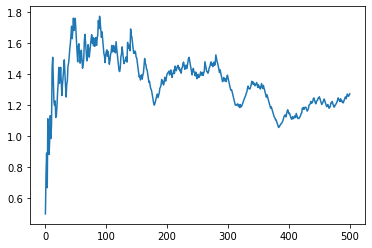

In [49]:
plt.plot(np.exp(out['LogScales']))
plt.show()

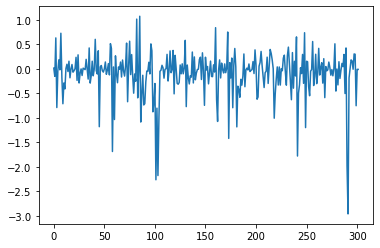

In [50]:
not_inf_logaps = out['logaps'] != -np.inf
plt.plot(out['logaps'][not_inf_logaps])
plt.show()

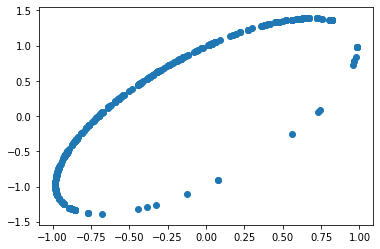

In [51]:
plt.scatter(*out['samples'].T)

In [59]:
out['LogScales'][-1]

0.24245740545976496

# Multiple ones

We have a training pair $(u, \lambda_u)$

In [186]:
# Generate a dataset of 30 points
def gen_data(num=10):
    z_vals = []
    s_vals = []
    for _ in range(num):
        x = target.rvs()
        z = target.pdf(x)
        ellipse = RotatedEllipse(mu, Sigma, z)
        ZappaObj = ZappaAdaptive(x, ellipse, logf, logp_scale, s, n, tol, a_guess, K, ap_star, exponent)
        out = ZappaObj.sample()
        z_vals.append(z)
        s_vals.append(np.exp(out['LogScales'][-1]))
    return np.array(z_vals), np.array(s_vals)

In [206]:
z_vals, s_vals = gen_data(num=1000)

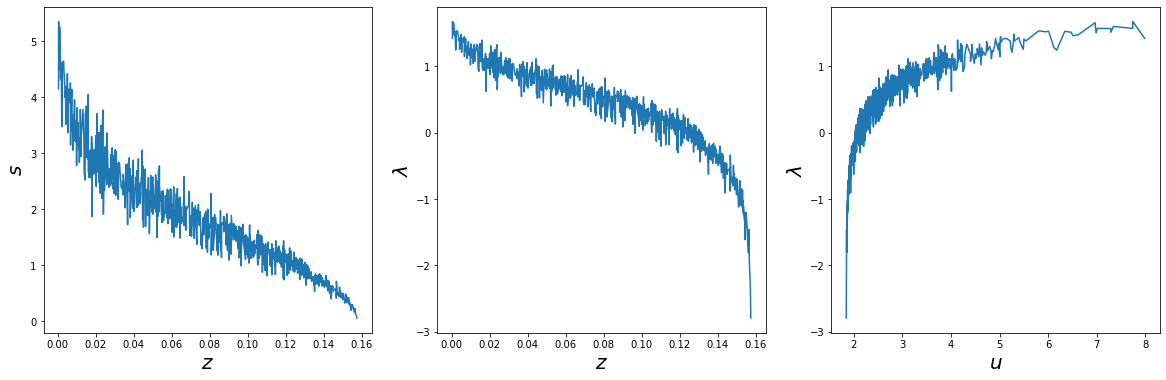

In [207]:
ix = np.argsort(z_vals)
z_vals = z_vals[ix]
s_vals = s_vals[ix]
ix2 = s_vals < 6
z_vals = z_vals[ix2]
s_vals = s_vals[ix2]
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
ax[0].plot(z_vals, s_vals)
ax[0].set_xlabel(r"$z$", fontsize=20)
ax[0].set_ylabel(r"$s$", fontsize=20)
ax[1].plot(z_vals, np.log(s_vals))
ax[1].set_xlabel(r"$z$",fontsize=20)
ax[1].set_ylabel(r"$\lambda$", fontsize=20)
ax[2].plot(-np.log(z_vals), np.log(s_vals))
ax[2].set_xlabel(r"$u$", fontsize=20)
ax[2].set_ylabel(r"$\lambda$", fontsize=20)
plt.show()

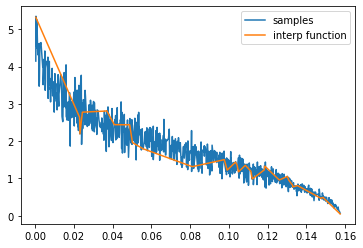

In [336]:
ix_samples = np.random.choice(len(z_vals), size=30, replace=False)
z_vals_int = z_vals[ix_samples]
s_vals_int = s_vals[ix_samples]
interp_func = interp1d(z_vals_int, s_vals_int, fill_value="extrapolate", kind='linear')
plt.plot(z_vals, s_vals, label="samples")
plt.plot(z_vals, interp_func(z_vals), label="interp function")
plt.legend()
plt.show()